Exeter Urban Analytics - Data analysis with *pandas*
===

Lecturer: Chico Camargo - f.camargo@exeter.ac.uk

We will be analysing comments from a YouTube video by the South Korean-Chinese boy band [EXO](https://en.wikipedia.org/wiki/Exo_%28band%29).

We have provided you with a ```.tsv``` file containing thousands of comments. ```.tsv``` stands for a file containing tab-separated values. You might also encounter files where the values are separated by commas (```,```), semicolons (```;```), or other characters.

Let's start by opening the file, and printing its first 3 lines:

In [5]:
# Open file and print the first 3 lines

with open('IoP18_kpop_comments.tsv', 'r', encoding='utf-8') as f:

    lines_read = 0
    
    for line in f:  
        lines_read += 1        
        
        if lines_read <= 3:
            print(line)
        else:
            break

Search	Title	VideoID	CommentID	CommentPublished	CommentUpdated	CommentTextDisplay	CommentAuthorName	CommentAuthorURI	CommentCanReply	CommentTotalReplyCount	CommentisPublic	CommentLikeCount	CommentVewerRating	IsReply	CommentPosterInfo

https://www.youtube.com/channel/UCEf_Bc-KVd7onSeifS3py9g	EXO_으르렁 (Growl)_Music Video (Korean ver.)	I3dezFzsNss	z22xh5jg4k2qihsxa04t1aokg4s1z3dasi1t0x00bl0rbk0h00410	2017-08-02T12:30:41.000Z	2017-08-02T12:30:41.000Z	hi love your group😍😍	Naomi Nicole Yambao	http://www.youtube.com/channel/UCgKNWcyzGUki05-dWN6ow8g	 false	 0	true	 0	none	0

https://www.youtube.com/channel/UCEf_Bc-KVd7onSeifS3py9g	EXO_으르렁 (Growl)_Music Video (Korean ver.)	I3dezFzsNss	z23uexlogtr2tlpuxacdp430horwegylmjduvkgwwydw03c010c	2017-08-02T12:22:35.000Z	2017-08-02T12:22:35.000Z	I reply love exo.	Ahmad Farhan Zarin	http://www.youtube.com/channel/UCPgG5K1vZ11Ml-AX1xJ2ItA	 false	 0	true	 0	none	0



As you can see, the lines in this file contain a lot of information about different elements of the comments, such as their text, or the number of likes and replies. It would be very cumbersome to read and process this file line by line. Fortunately, there is a python library built exactly for this purpose: it's called **pandas**.

A python library is a code package that adds new objects, functions and methods to your toolkit. **pandas** is an open source library providing high-performance, easy-to-use tools for data analysis.

Let's get started by importing **pandas**.

We do this by asking python to import it and giving it an alias. In this case, we'll call it **pd**:

In [6]:
import pandas as pd

After we run the code above, whenever we want to use a function from **pandas**, such as the function ```read_csv``` we just need to write ```pd.read_csv()```, with the filename, and the delimiter, which in this case is the _tab_ character ```\t```.

Now let's load the dataset:

In [7]:
raw_comments = pd.read_csv('IoP18_kpop_comments.tsv', delimiter='\t')

print( type(raw_comments) )

<class 'pandas.core.frame.DataFrame'>


The function ```pd.read_csv()``` returns a new variable of the type **DataFrame**. You can think of this object as a spreadsheet.

The command ```raw_comments.head()``` shows the first rows of the dataframe ```raw_comments```:

In [8]:
raw_comments.head()

,Search,Title,VideoID,CommentID,CommentPublished,CommentUpdated,CommentTextDisplay,CommentAuthorName,CommentAuthorURI,CommentCanReply,CommentTotalReplyCount,CommentisPublic,CommentLikeCount,CommentVewerRating,IsReply,CommentPosterInfo
0,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z22xh5jg4k2qihsxa04t1aokg4s1z3dasi1t0x00bl0rbk...,2017-08-02T12:30:41.000Z,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,http://www.youtube.com/channel/UCgKNWcyzGUki05...,false,0.0,True,0.0,none,0.0,NaN
1,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z23uexlogtr2tlpuxacdp430horwegylmjduvkgwwydw03...,2017-08-02T12:22:35.000Z,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,http://www.youtube.com/channel/UCPgG5K1vZ11Ml-...,false,0.0,True,0.0,none,0.0,NaN
2,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z230ibrzhyyqvbb5k04t1aokgimmqowmdk3y52tvq1mlbk...,2017-08-02T10:03:26.000Z,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,http://www.youtube.com/channel/UCBEz6cQfyxMC9G...,false,0.0,True,0.0,none,0.0,NaN
3,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z224etfowwr2wvzwm04t1aokgljq3oegusu4ltzmc5mdbk...,2017-08-02T09:13:33.000Z,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,http://www.youtube.com/channel/UCfa8YIK7eVm_9g...,false,0.0,True,0.0,none,0.0,NaN
4,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z22vw5fylsv2sxzaq04t1aokg4nt21krutepbqls05zrbk...,2017-08-01T23:04:24.000Z,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,http://www.youtube.com/channel/UCCisZVYC0gOOmn...,false,0.0,True,0.0,none,0.0,NaN


You can specify how many rows you want to see, by giving the function **head()** an integer:

In [9]:
raw_comments.tail(3)

,Search,Title,VideoID,CommentID,CommentPublished,CommentUpdated,CommentTextDisplay,CommentAuthorName,CommentAuthorURI,CommentCanReply,CommentTotalReplyCount,CommentisPublic,CommentLikeCount,CommentVewerRating,IsReply,CommentPosterInfo
14997,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z121dtjiknbmwppsm22bc3v4nme4vxq2u,2015-01-14T14:22:22.000Z,2015-01-14T14:22:22.000Z,EXO Growl is the 5th most viewed mv in SMTOWN!...,"When a unicorn farted, Lay existed",http://www.youtube.com/channel/UCfQrnN-n7jnRd8...,false,0.0,True,2.0,none,0.0,NaN
14998,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z13zfvj55lzbf5yku23zdtry2qf0cf4rx04,2015-01-14T11:34:38.000Z,2015-01-14T11:34:38.000Z,And now HAPPY BIRTHDAY TO KIM JONG IN! I LOVE ...,Jongin's Sugarmommy,http://www.youtube.com/channel/UCylKfgJAUjfX3A...,false,0.0,True,2.0,none,0.0,NaN
14999,https://www.youtube.com/channel/UCEf_Bc-KVd7on...,EXO_으르렁 (Growl)_Music Video (Korean ver.),I3dezFzsNss,z13fdjt54xyojeort44r9dkqugrgc5rho2s,2015-01-14T11:33:30.000Z,2015-11-14T11:33:30.000Z,Kai's hat ❤️,Maya RAra,http://www.youtube.com/channel/UCyRu0dAeRr7rgf...,false,0.0,True,0.0,none,0.0,NaN


The DataFrame is displayed as a table, with an **index** (_0,1,2,..._) labelling every row, and a **key** (_Search, Title, VideoID, ..._) labelling every column. You can scroll the DataFrame horizontally to see all other columns.

Since not all columns are interesting to us, we can also **filter** the DataFrame, to select only the relevant variables.

We do that by writing ```raw_comments[x]```, where ```x``` is a list of the keys we want to keep.

Let's create a new variable called ```comments```, with the filtered DataFrame.

In [13]:
# also note that I split the command in two lines, to make it easier to read:

to_filter = ['CommentPublished','CommentTextDisplay','CommentAuthorName',
             'CommentLikeCount','CommentTotalReplyCount','Title']

comments = raw_comments.filter(items=to_filter)

# Display first rows of the new dataframe
comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount,Title
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0,0.0,EXO_으르렁 (Growl)_Music Video (Korean ver.)


We will also remove any rows containing null (_NaN_, or _not a number_) results.

The command ```comments.dropna()``` returns a dataframe identical to ```comments```, but removing any _rows_ containing _NaN_.

So let's replace our ```comments``` dataframe by ```comments``` without any null values.

In [14]:
comments = comments.dropna()

You can remove columns with ```del comments['key']```, replacing ```'key'``` by the name of the column you want to remove.

In [15]:
# Remove column 'Title'
del comments['Title']

# Display first rows of the dataframe
comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0,0.0
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0,0.0
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0,0.0
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0,0.0
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0,0.0


In [16]:
comments[ ['CommentPublished','CommentLikeCount'] ].head()

,CommentPublished,CommentLikeCount
0,2017-08-02T12:30:41.000Z,0.0
1,2017-08-02T12:22:35.000Z,0.0
2,2017-08-02T10:03:26.000Z,0.0
3,2017-08-02T09:13:33.000Z,0.0
4,2017-08-01T23:04:24.000Z,0.0


### Sorting a dataframe according to one of its columns.

Given a dataframe ```df```, the command ```df.sort_values('column_name_here')``` produce a dataframe with the same rows as ```df```, but ordered according to the column specified by ```'column_name_here'```. Here's an example:

In [17]:
sorted_dataframe = comments.sort_values('CommentLikeCount')

sorted_dataframe.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0,0.0
8289,2016-05-06T02:11:34.000Z,"Ahhhhhhh!!! Overdose made it to 100m, let's ge...",Jimin Kang,0.0,0.0
8290,2016-05-06T02:04:27.000Z,Road to 100M !!!!!! #EXO-L fighting,FahFy BIBI Ch,0.0,0.0
8291,2016-05-06T02:00:15.000Z,Let's reach this mv to 100 M also EXO-L's!!! \...,tale janica,0.0,0.0
8293,2016-05-06T01:58:52.000Z,Fighting for 100million views 👏🏻,Ghina Qothrunnada,0.0,0.0


Note that the dataframe above does not seem to be sorted. This is because it is sorted in _ascending_ order, from the smallest value (```CommentLikeCount == 0```, in this case) to the largest value.

Instead, we can sort in _descending_ order, starting from the comment with the largest number of likes:

In [18]:
sorted_dataframe = comments.sort_values('CommentLikeCount', ascending=False)

sorted_dataframe.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount
9463,2016-03-21T07:23:18.000Z,I still remember the day I first watched this ...,realistic dreamr,3821.0,85.0
3793,2017-01-05T13:17:41.000Z,Who's watching this in 2017?,Kai,2415.0,221.0
10207,2016-02-02T08:35:26.000Z,2012- i found you. 2013- i fell in love with ...,claire oh,2330.0,131.0
4875,2016-10-20T10:12:13.000Z,The day came today where I finally learnt all ...,vin dm,2286.0,66.0
9299,2016-03-26T20:37:50.000Z,*aggressively stares at my bias*,Alix Malone,2108.0,55.0


### You can also concatenate both commands, as below:
Concatenating commands is a very useful trick if you don't want to create a new dataframe just for that.

In [19]:
comments.sort_values('CommentLikeCount', ascending=False).head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount
9463,2016-03-21T07:23:18.000Z,I still remember the day I first watched this ...,realistic dreamr,3821.0,85.0
3793,2017-01-05T13:17:41.000Z,Who's watching this in 2017?,Kai,2415.0,221.0
10207,2016-02-02T08:35:26.000Z,2012- i found you. 2013- i fell in love with ...,claire oh,2330.0,131.0
4875,2016-10-20T10:12:13.000Z,The day came today where I finally learnt all ...,vin dm,2286.0,66.0
9299,2016-03-26T20:37:50.000Z,*aggressively stares at my bias*,Alix Malone,2108.0,55.0


### Accessing the value of individual rows.
In the cell below, we look at the author of each comment, which is in the ```'CommentAuthorName'``` row:

In [20]:
print( comments['CommentTextDisplay'] )

0                                     hi love your group😍😍
1                                        I reply love exo.
2                        I love exo  gussssssss 💜💜💜💜💜💜💜💜💜💜
3        pause the video at exactly 1:10 and you nothic...
4        I have watched this way too many times for my ...
5        watching this video in 2017. i hope kokobop ge...
6                      when  they were still complete  : (
7        3:01 though😂😂 chanyeol still memorize when he ...
8                                      1:10 who is there ?
9                  Still love that save by kai at 2:16 xdd
10                 1:12 Stay on 1:12 and look to the back!
11       Its hard to watch these videos man I swear I m...
12             I wish that had the lyrics to it in English
13         august 2017 and im still here watching this ㅋㅋㅋ
14       the best mv to be watched whenever i miss ot12...
15       I don't know how I ever thought they look simi...
16       Didn't anyone notice the silhouette on D.O.'s .

Note that ```comments['CommentAuthorName']``` is not displayed as a dataframe, like the variable ```comments``` was.

This is because ```comments['CommentAuthorName']``` is a **series**, which is much like an array of values attached to indices, which in this case go from 0 to 14999. We won't dwell much on series, but they are useful for a few things. One of the things that makes **series** different from ordinary lists is which functions you can call on them.

For instance, if you want to count how many times each ```CommentAuthorName``` appears in this series, you can use ```value_counts()```:

In [20]:
comments['CommentAuthorName'].value_counts()

watch EXO's KOKOBOP MV                       33
jeng Gloria                                  28
Kokobop ph                                   20
Kings Are Coming                             19
Kim Jong Kai                                 18
Elena Skylar                                 13
Chicky Lee                                   13
exo love                                     12
ExoYeolBaek                                  12
Salimatou Balde                              12
Exo-l & a Jongdae Stan                       12
DRdeliciousMA                                10
Alina Salvator                               10
Euly Cordero                                  9
Ana Alfonso                                   9
Happiness Delight                             9
Park Chanyeol                                 9
Silverlighteu                                 8
D.O.rothy Sooco                               8
Sehun Malfoy                                  8
Nicole T.                               

You can add columns by assigning ```comments['key']``` to a list of values, replacing ```'key'``` by the name of the column you want to create.

In [40]:
# create list of values
first_letter_of_name = [ name[0] for name in comments['CommentAuthorName'] ]

# assign that list to a new column in the dataframe
comments['FirstLetter'] = first_letter_of_name

# display dataframe
comments.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount,FirstLetter
0,2017-08-02T12:30:41.000Z,hi love your group😍😍,Naomi Nicole Yambao,0.0,0.0,N
1,2017-08-02T12:22:35.000Z,I reply love exo.,Ahmad Farhan Zarin,0.0,0.0,A
2,2017-08-02T10:03:26.000Z,I love exo gussssssss 💜💜💜💜💜💜💜💜💜💜,sheridan tulio,0.0,0.0,s
3,2017-08-02T09:13:33.000Z,pause the video at exactly 1:10 and you nothic...,Seraph Gaming,0.0,0.0,S
4,2017-08-01T23:04:24.000Z,I have watched this way too many times for my ...,Ashleigh Sharman,0.0,0.0,A


A second way to refer to a column like ```comments['FirstLetter']``` is by writing ```comments.FirstLetter```. Both return the same result.

Naturally, if the name of the column has any spaces, such as ```'First Letter'``` instead of ```'FirstLetter'```, the command ```comments.First Letter``` will not work. In that case, we recommend writing ```comments['First Letter']```.

***

## Masks

A common thing to do with a dataframe is slicing it in different ways. For example, we can select all comments before a specific date, or all comments by a specific author.

In pandas, this is done by applying **masks**. Masks are series of Boolean (True/False) values. They are based on the idea that the expression ```x == 10```, for example, evaluates to either ```True``` or ```False```, depending on the value of ```x```. Masks do the same for a series of numbers.

In the example below, ```my_mask``` is a mask applied to ```comments['CommentAuthorName']```. It contains a series of values which are ```True``` when the comment author is ```"Elena Skylar" ```, and ```False``` otherwise.

In [25]:
# Using parenthesis for clarity only

my_mask = (comments['CommentAuthorName'] == "Elena Skylar")

print(my_mask)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
14966    False
14967    False
14968    False
14971    False
14972    False
14973    False
14974    False
14975    False
14976    False
14977    False
14978    False
14979    False
14980    False
14981    False
14982    False
14983    False
14984    False
14985    False
14986    False
14987    False
14988    False
14989    False
14991    False
14993    False
14994    False
14995    False
14996    False
14997    False
14998    False
14999    False
Name: CommentAuthorName, Length: 11770, dtype: bool


### We can use masks to create new dataframes corresponding to slices of the original dataframe.
This is done as below:

In [26]:
mask1 = (comments['CommentAuthorName'] == "Elena Skylar") # Using parenthesis for clarity only

comments_by_user = comments[mask1]

comments_by_user.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount
13782,2015-05-11T07:02:25.000Z,For the ones who just discover EXO these days ...,Elena Skylar,1.0,0.0
13792,2015-05-10T01:43:40.000Z,My dream is to see Growl become the first 100M...,Elena Skylar,160.0,8.0
14010,2015-04-23T04:35:00.000Z,I watch this again and try to have the same fe...,Elena Skylar,0.0,0.0
14320,2015-03-22T12:34:14.000Z,OMG so close to 62MIL! Go go go EXO-L!!!,Elena Skylar,6.0,0.0
14405,2015-03-13T03:16:42.000Z,I love you everyday,Elena Skylar,4.0,0.0


In [ ]:
# A shorter way to do it

comments_by_user = comments[ comments['CommentAuthorName'] == "Elena Skylar" ]

comments_by_user.head()

### Masks can be combined. The result is always another dataframe.

You can combine masks using ```&``` and ```|```, which stand for ```and``` and ```or```. For example:

~~~ python
mask1 = (comments['CommentAuthorName']  == "Elena Skylar")
mask2 = (comments['CommentLikeCount'] > 10)

mask_and = mask1 & mask2
mask_or  = mask1 | mask2
~~~

In the example above,

```mask_and``` is a series which is ```True``` when both ```mask1``` and ```mask2``` are ```True```, and false otherwise,

and ```mask_or``` is a series which is ```True``` when either ```mask1``` or ```mask2``` (or both) are ```True```, and false when both are ```False```.

Here's a dataframe combining one mask on the key ```'CommentAuthorName'``` and another on ```'CommentLikeCount'```:

In [42]:
mask1 = (comments['CommentAuthorName']  == "Elena Skylar")
mask2 = (comments['CommentLikeCount'] > 10)

mask_and = mask1 & mask2

comments_many_likes = comments[mask_and]

comments_many_likes.head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount,FirstLetter
13792,2015-05-10T01:43:40.000Z,My dream is to see Growl become the first 100M...,Elena Skylar,160.0,8.0,E
14533,2015-03-01T03:42:23.000Z,I heard the news that this comeback EXO will b...,Elena Skylar,62.0,13.0,E


In [44]:
# You can do it all in one command:

comments[ (comments['CommentAuthorName']  == "Elena Skylar")
        & (comments['CommentLikeCount'] > 10) ].head()

,CommentPublished,CommentTextDisplay,CommentAuthorName,CommentLikeCount,CommentTotalReplyCount,FirstLetter
13792,2015-05-10T01:43:40.000Z,My dream is to see Growl become the first 100M...,Elena Skylar,160.0,8.0,E
14533,2015-03-01T03:42:23.000Z,I heard the news that this comeback EXO will b...,Elena Skylar,62.0,13.0,E


## Iterating over rows with `df.iterrows()`

To iterate over all rows in a dataframe ```df```, you can use ```df.iterrows()``` in the following way:

~~~ python
for index, row in df.iterrows():
    do_something 
~~~

In this iteration, the variable ```index``` will run over the index of the dataframe, i.e. its leftmost column, while the variable ```row``` will run over its rows.

You can access the value corresponding to each column by writing the key name inside square brackets, as below:

~~~ python
for index, row in df.iterrows():
    do_something( row['key_name_here'] )
~~~

For the rows, just like for dataframe columns, the format ```row.key_name_here``` is equivalent to ```row['key_name_here']```.

Below, we print the columns values for the first five entries in the the ```comments``` dataframe.

In [46]:
first_comments = comments.head(5)

for index, row in first_comments.iterrows():
    print( index )
    print( row.CommentPublished   )
    print( row['CommentTextDisplay'] )
    print( row.CommentAuthorName  )
    print( row.CommentLikeCount   )
    print()

0
2017-08-02T12:30:41.000Z
hi love your group😍😍
Naomi Nicole Yambao
0.0

1
2017-08-02T12:22:35.000Z
I reply love exo.
Ahmad Farhan Zarin
0.0

2
2017-08-02T10:03:26.000Z
I love exo  gussssssss 💜💜💜💜💜💜💜💜💜💜
sheridan tulio
0.0

3
2017-08-02T09:13:33.000Z
pause the video at exactly 1:10 and you nothice that theres a person in top right in the window like if u scared
Seraph Gaming
0.0

4
2017-08-01T23:04:24.000Z
I have watched this way too many times for my parents to not consider sending me to a mental asylum
Ashleigh Sharman
0.0



There is much more about pandas, but let's now wrap that up with one final topic: **how to visualise your dataset.**

***

# Basic statistics and data visualisation

Now that we have learned the basics of how to handle a dataset, it is time to visualise some of its statistics. 

We will be importing the ```matplotlib``` and ```seaborn``` libraries, just to make your plots a bit clearer. We recommend you take a look at the seaborn website for some examples of gorgeous plots you can make with python:
https://seaborn.pydata.org/examples/index.html

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# This sets a style for your plots. You can also try 'talk', 'notebook' or 'paper'.
sns.set('poster')
sns.set_style('whitegrid')

In [27]:
sns.__version__

'0.9.0'

### Plot 1 - Let's make a histogram

A histogram is a graphical display of data using bars of different heights. In a histogram, each bar groups numbers into ranges, like 0-10, 10-20 and 20-30. Taller bars show that more data falls in that range. A histogram displays the shape and spread of sample data.

Let's try to make a histogram for the number of likes every comment receives. This is done by running ```comments['CommentLikeCount'].hist()```:

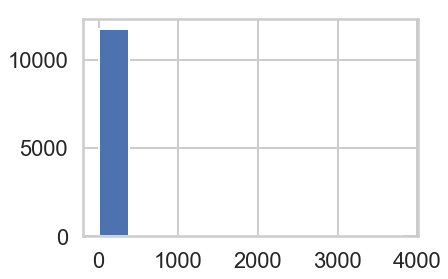

In [28]:
histogram = comments['CommentLikeCount'].hist()

Well, this isn't very useful. It shows that most comments receive between 0 and around 500 likes, which isn't exactly surprising.

Let's look at this plot on a logarithmic scale, that is, looking at orders of magnitude on the y axis:

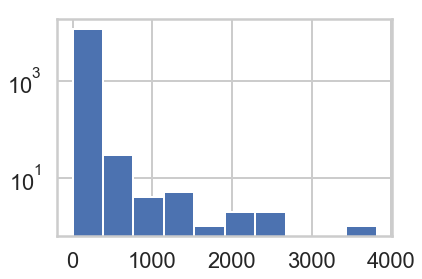

In [29]:
histogram = comments['CommentLikeCount'].hist()

plt.yscale('log')

This is a little bit better. As you know, $10^0$, $10^1$ and $10^2$ stand for $1$, $10$ and $100$, and so on.

This plot is saying that there are about 10000 comments with few likes, and very few comments (around $10^0 = 1$) comments with over 1000 likes.

Let's tweak this plot a little more, by increasing the number of _bins_ in the histogram, increasing the figure size, and adding a label to each axis:

Text(0, 0.5, 'number of comments')

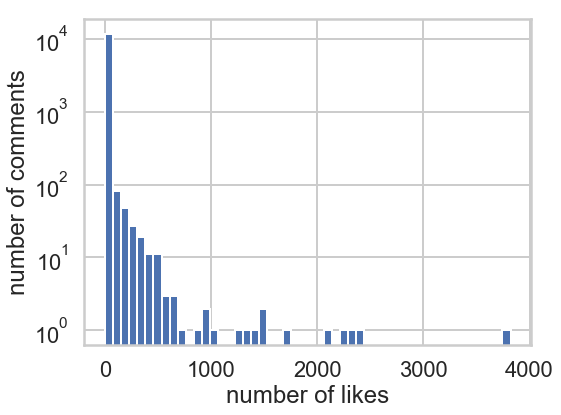

In [30]:
# make histogram with 50 bins
# and a figure size of 8 inches x 6 inches

histogram = comments['CommentLikeCount'].hist( bins=50, figsize=(8,6) )

histogram.set_yscale('log')

histogram.set_xlabel('number of likes')
histogram.set_ylabel('number of comments')

This makes the pattern much clearer!

We can also use ```iterrows``` to look in more detail at the comments with the most likes, indicated by a high ```'CommentLikeCount'```:

In [31]:
mask1 = ( comments['CommentLikeCount'] > 2000 )

most_liked_comments = comments[mask1]

for index, row in most_liked_comments.iterrows():
    print( row['CommentLikeCount'] , "likes:", row['CommentTextDisplay'] , "\n")

2415.0 likes: Who's watching this in 2017? 

2286.0 likes: The day came today where I finally learnt all of their names  And honestly it feels like one of the greatest accomplishments of my life lmao 

2108.0 likes: *aggressively stares at my bias* 

3821.0 likes: I still remember the day I first watched this mv. I was so overwhelmed and taken aback. It's been a wild ride and I'm still here. Love Exo, love anyone who continues to support ot9. 

2330.0 likes: 2012- i found you.  2013- i fell in love with you.  2014- i missed you.  2015- i trusted you  2016- i still  support you. 



#### And here are the comments with the most replies, indicated by a higher ```'CommentTotalReplyCount'```:

In [32]:
mask2 = ( comments['CommentTotalReplyCount'] > 200 )
most_replied_comments = comments[mask2]

for index, row in most_replied_comments.iterrows():
    print( row['CommentTotalReplyCount'] , "replies:", row['CommentTextDisplay'] , "\n")

221.0 replies: Who's watching this in 2017? 

240.0 replies: One day this will reach 100 m. Let's go exo-ls!! 

278.0 replies: Dear new EXO-ls :  There are two things you need to know,  Don't fall in love with the pink haired boy.  Don't fall in love with the tall blonde boy with red shoes and a tie.   Trust me don't because your heart will be hurt in the end 



### Plot 2 - Let's make a scatter plot

Notice how the comments with the highest numbers of replies are not necessarily the comments with the highest numbers of likes. We can investigate the relation between both variables by making a *scatter plot*. This is a graph in which the values of two variables are plotted as dots along two axes, the pattern of the resulting points revealing any correlation present.

You can make a scatter plot using ```comments.plot.scatter``` and specifying the ```x``` and ```y``` axes:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


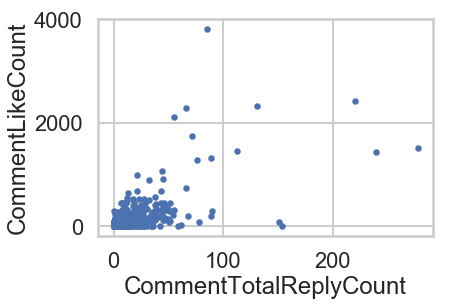

In [33]:
scatter_plot = comments.plot.scatter(x='CommentTotalReplyCount', y='CommentLikeCount')

Note how since most values for ```'CommentTotalReplyCount'``` and ```'CommentLikeCount'``` are low, the plot is very dense in that range.

We can address that by plotting the x and y axes in logarithmic scale. 

And again, let's increase the figure size (_figsize_), and add a label to each axis:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'number of likes')

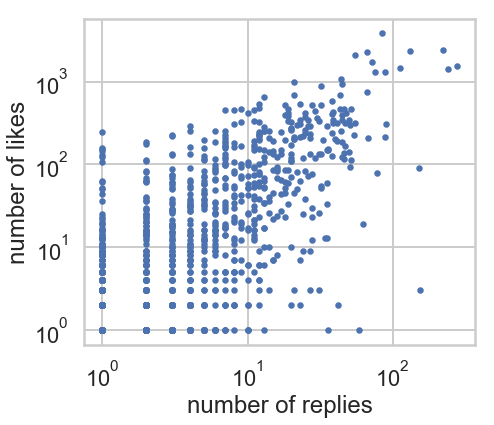

In [34]:
# figsize: 7 inches x 6 inches

mask = (comments.CommentTotalReplyCount>0) & (comments.CommentLikeCount > 0)

scatter_plot = comments[mask].plot.scatter(x='CommentTotalReplyCount',
                                           y='CommentLikeCount',
                                           figsize=(7,6))

scatter_plot.set_yscale('log')
scatter_plot.set_xscale('log')

scatter_plot.set_xlabel('number of replies')
scatter_plot.set_ylabel('number of likes')

This plot contains a lot of information. There are many comments with hundreds of likes but no reply, as well as comments with tens of replies but no like. However, as both numbers grow, they become correlated. For instance, a post with over 100 likes is likely to have at least 10 replies.

***

Much like the previous lecture notes, this is by no means a full course on _pandas_, data analysis, data visualisation, or python for that matter. That said, we hope this was enough to give you a taste of what they can do for you, and of how you can use them as part of your research toolkit.

In the exercises, we will be doing a few analyses with _pandas_, and trying to make a plot or two. Good luck!